In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import json

In [2]:
experiment_name = "finetuning_intelli_light_prcol_reward"

In [3]:
df = pd.read_csv(f"../evaluations/{experiment_name}.csv")

In [4]:
hd_columns = [column for column in df.columns if column.startswith("avg_hd")]
reward_columns = [column for column in df.columns if column.startswith("avg_reward")]
config_keys = list( json.loads(df.config.to_list()[0]).keys())

df["total_avg_reward"] = df[reward_columns].mean(axis=1)
df["total_avg_hd_distance"] = df[hd_columns].mean(axis=1)

for key in config_keys:
    df[key] = df["config"].apply(lambda x: json.loads(x)[key])

In [6]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_hd_distance", ascending=False).head(20)

,config,total_avg_reward,total_avg_hd_distance
1,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2826.298237,0.255302
4,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2872.845374,0.245101
2,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2914.114722,0.243848
0,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2859.678584,0.226600
5,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2917.357828,0.217328
3,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2977.749807,0.197800


In [7]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_reward", ascending=False).head(20)

,config,total_avg_reward,total_avg_hd_distance
1,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2826.298237,0.255302
0,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2859.678584,0.226600
4,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2872.845374,0.245101
2,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2914.114722,0.243848
5,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2917.357828,0.217328
3,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2977.749807,0.197800


In [8]:
df_top_20 = df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_reward", ascending=False).head(20)
df_top_20.to_csv(f"./top_20_{experiment_name}.csv", index=False)
df_top_20

,config,total_avg_reward,total_avg_hd_distance
1,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2826.298237,0.255302
0,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2859.678584,0.226600
4,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2872.845374,0.245101
2,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2914.114722,0.243848
5,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2917.357828,0.217328
3,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-2977.749807,0.197800


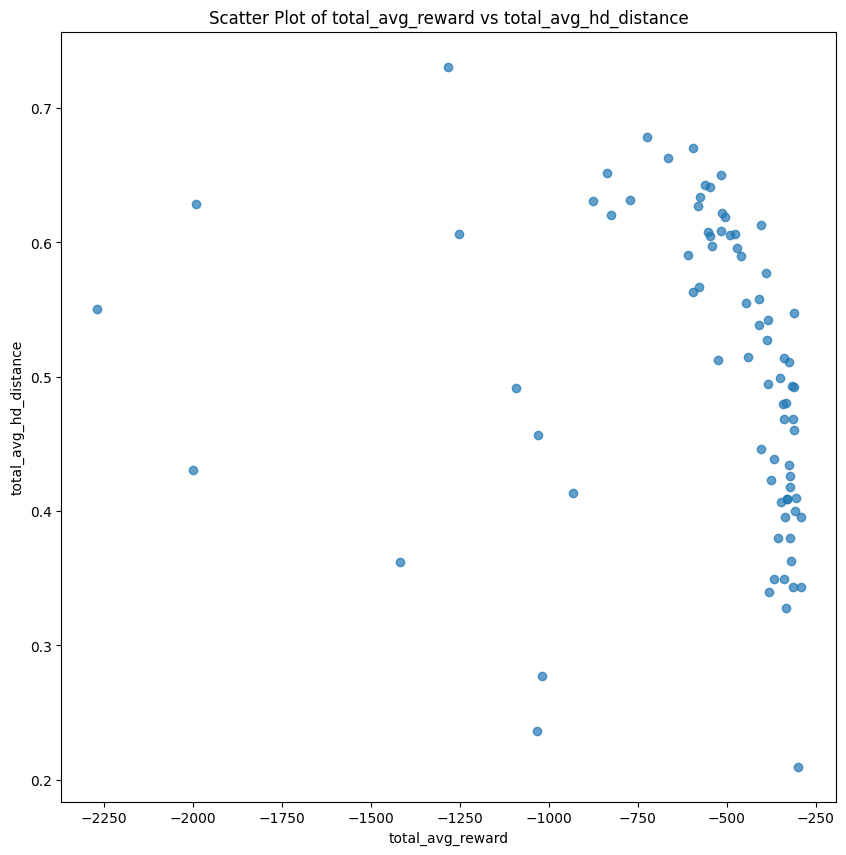

In [42]:
col1 = "total_avg_reward"
col2 = "total_avg_hd_distance"
plt.figure(figsize=(10, 10))
plt.scatter(df[col1], df[col2], alpha=0.7)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter Plot of {col1} vs {col2}')
plt.show()

In [51]:
print("Correlation total_avg_hd_distance and total_avg_reward", df["total_avg_hd_distance"].corr(df['total_avg_reward']))

Correlation total_avg_hd_distance and total_avg_reward -0.20375162023896692


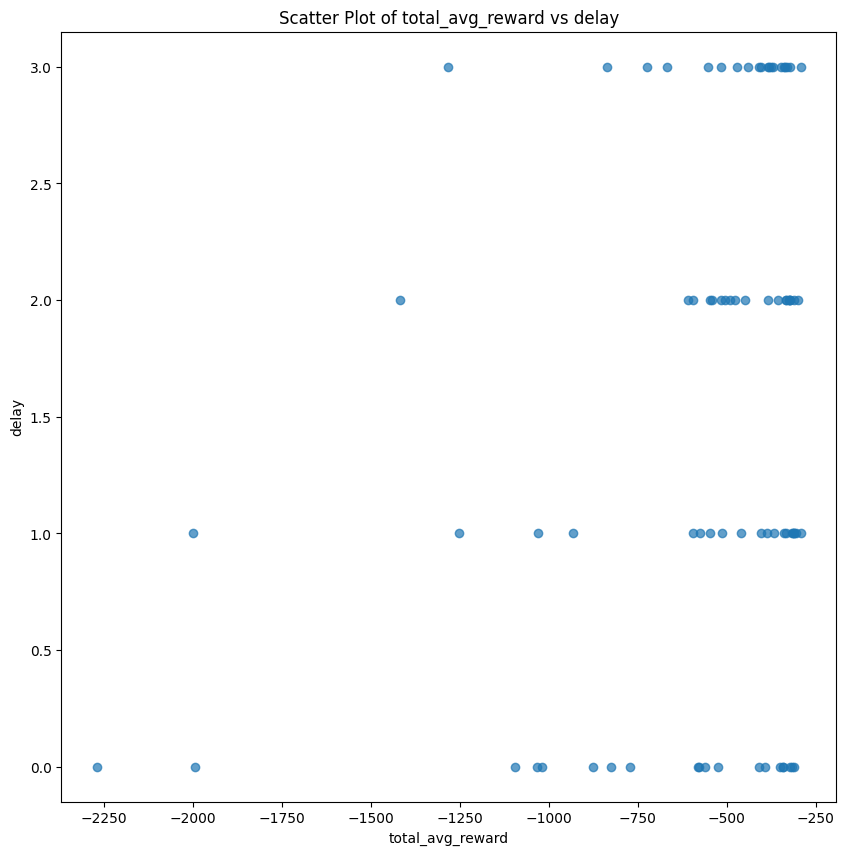

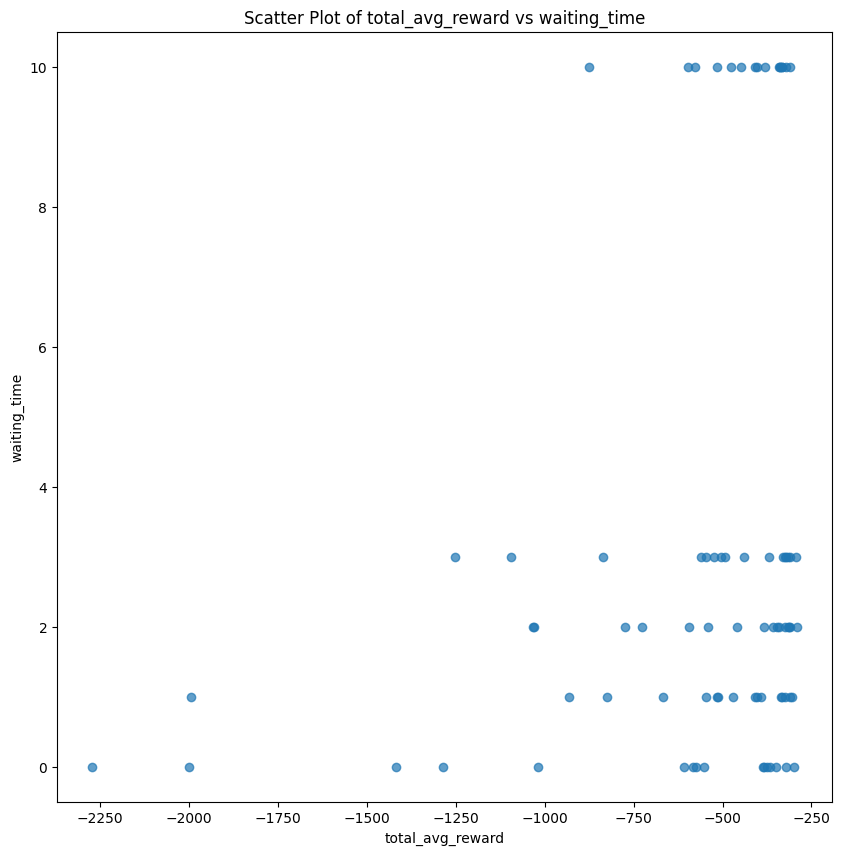

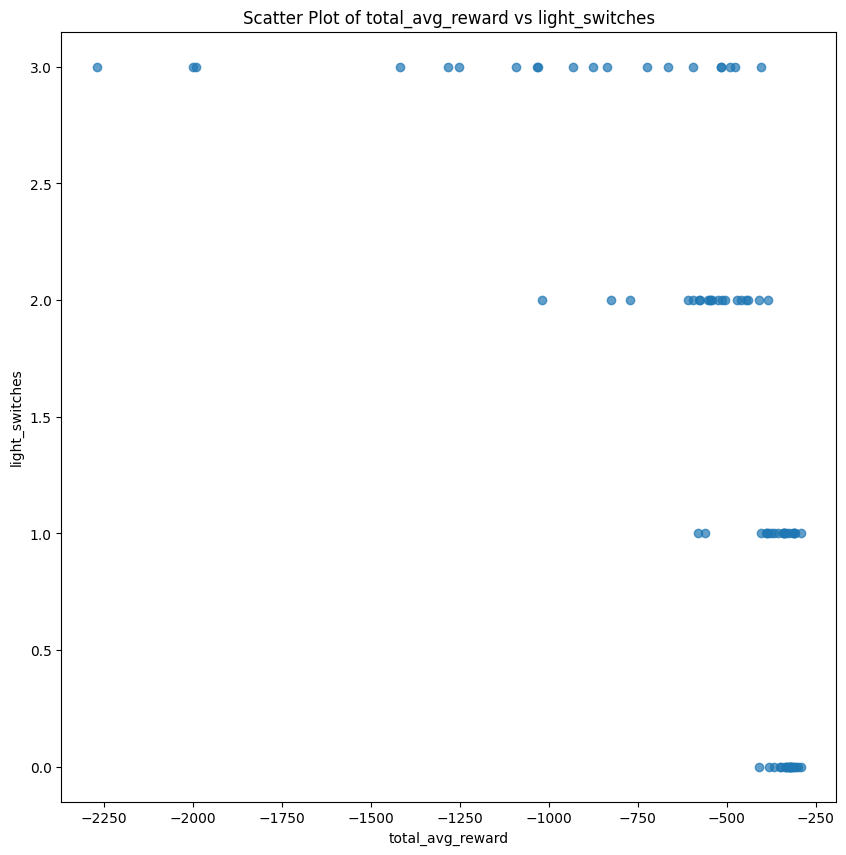

In [43]:
for col in config_keys:
    col1 = "total_avg_reward"
    col2 = col
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

In [44]:
for key in config_keys:
    print(df.groupby(key)['total_avg_reward'].agg(['mean', 'std']).reset_index())
    print(f"Correlation {key} and total_avg_reward", df[key].corr(df['total_avg_reward']))

   delay        mean         std
0      0 -745.562931  542.943408
1      1 -579.477319  428.888882
2      2 -472.672925  245.685722
3      3 -489.207325  237.224742
Correlation delay and total_avg_reward 0.2502485172648241
   waiting_time        mean         std
0             0 -799.830648  625.020494
1             1 -579.777672  419.651870
2             2 -509.063055  253.360307
3             3 -532.345211  288.371103
4            10 -437.634039  148.222631
Correlation waiting_time and total_avg_reward 0.22734136376750402
   light_switches         mean         std
0               0  -332.080969   28.059289
1               1  -368.368237   76.223331
2               2  -565.879681  151.343297
3               3 -1020.591612  546.930492
Correlation light_switches and total_avg_reward -0.646582786393077


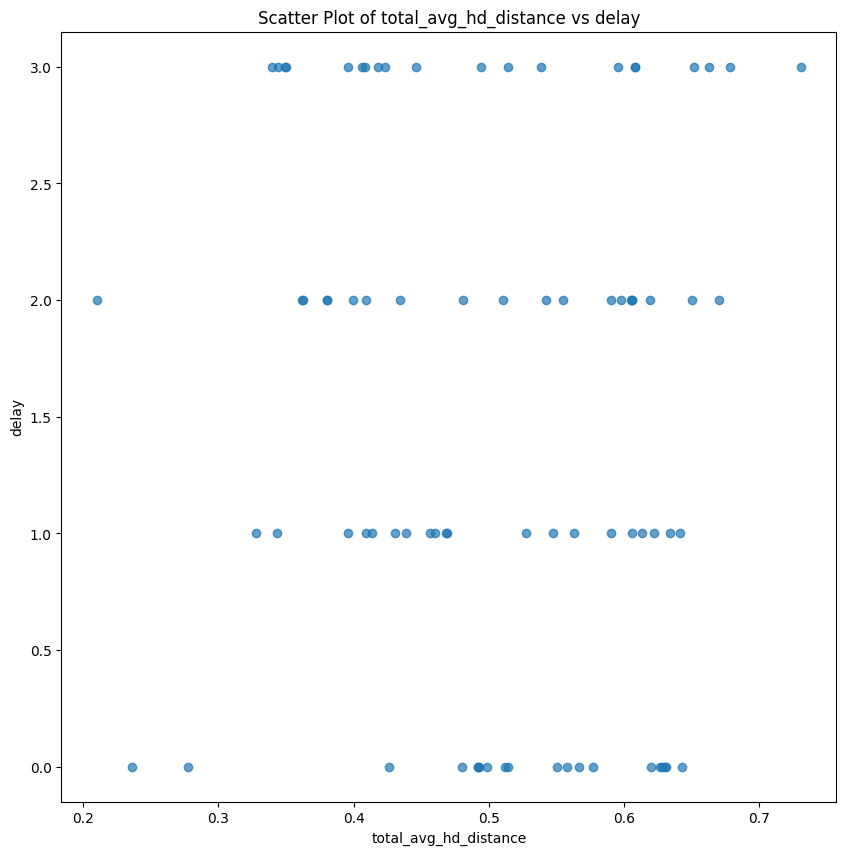

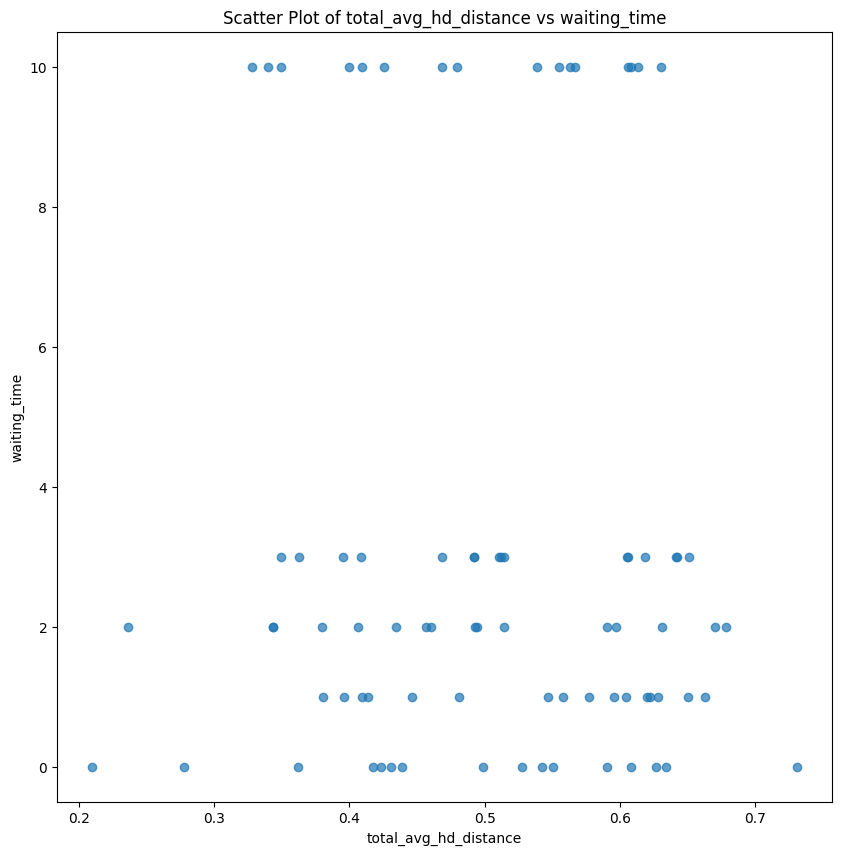

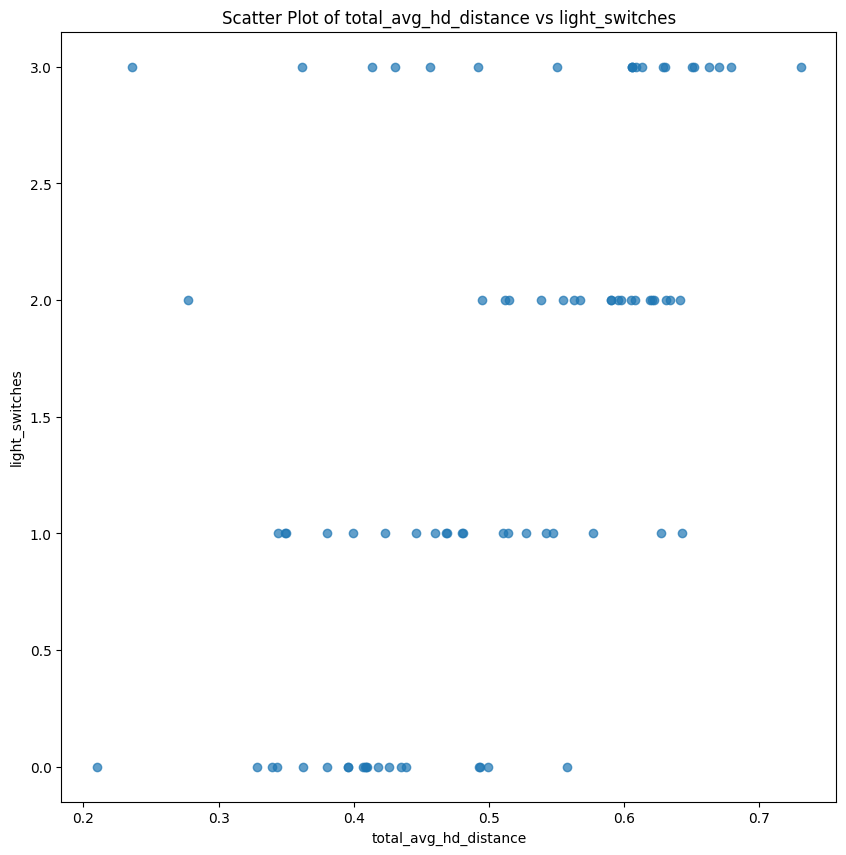

In [46]:
for col in config_keys:
    col1 = "total_avg_hd_distance"
    col2 = col
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

In [14]:
for key in config_keys:
    print(df.groupby(key)['total_avg_hd_distance'].agg(['mean', 'std']).reset_index())
    print(f"Correlation {key} and hd_distance", df[key].corr(df['total_avg_hd_distance']))

   delay      mean       std
0      0  0.522663  0.110784
1      1  0.497883  0.099085
2      2  0.498485  0.124709
3      3  0.498164  0.127281
Correlation delay and hd_distance -0.07175441701089601
   waiting_time      mean       std
0             0  0.491760  0.137880
1             1  0.536981  0.099544
2             2  0.483129  0.126776
3             3  0.517000  0.102470
4            10  0.492623  0.105864
Correlation waiting_time and hd_distance -0.04387832112957595
   light_switches      mean       std
0               0  0.407382  0.074231
1               1  0.476849  0.087086
2               2  0.568808  0.080921
3               3  0.564155  0.125868
Correlation light_switches and hd_distance 0.5534846763071253


/tmp/ipykernel_8532/3557940745.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[col1] = df_env[[f"avg_reward_{env}_agent1", f"avg_reward_{env}_agent2"]].mean(axis=1)
/tmp/ipykernel_8532/3557940745.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[col2] = df_env[[f"avg_hd_distance_{env}_agent1",f"avg_hd_distance_{env}_agent2"]].mean(axis=1)


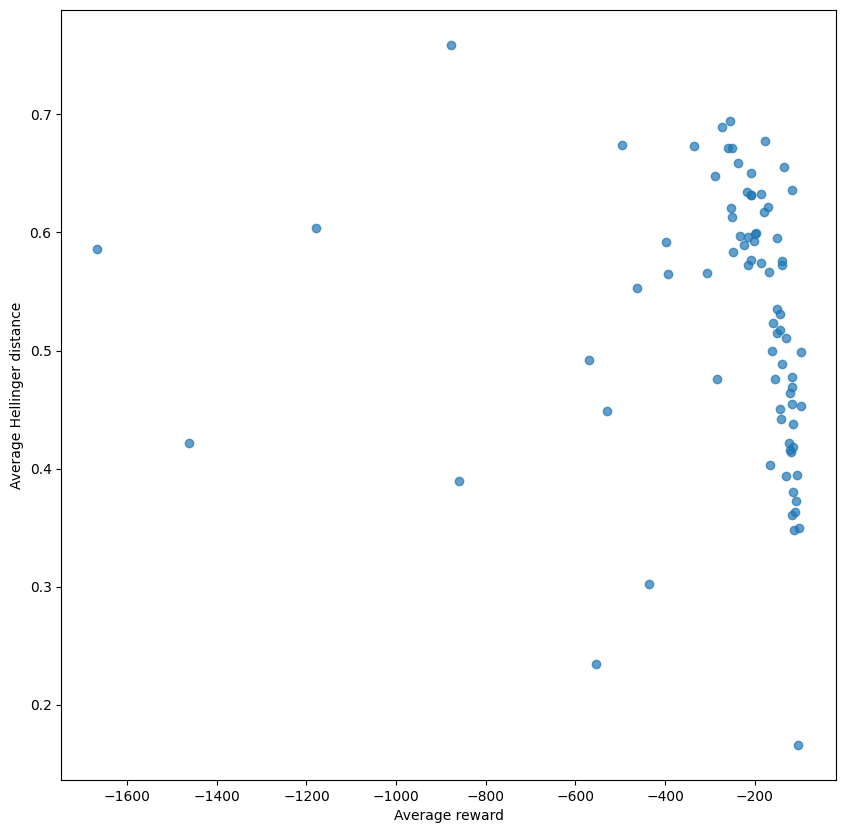

/tmp/ipykernel_8532/3557940745.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[col1] = df_env[[f"avg_reward_{env}_agent1", f"avg_reward_{env}_agent2"]].mean(axis=1)
/tmp/ipykernel_8532/3557940745.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[col2] = df_env[[f"avg_hd_distance_{env}_agent1",f"avg_hd_distance_{env}_agent2"]].mean(axis=1)


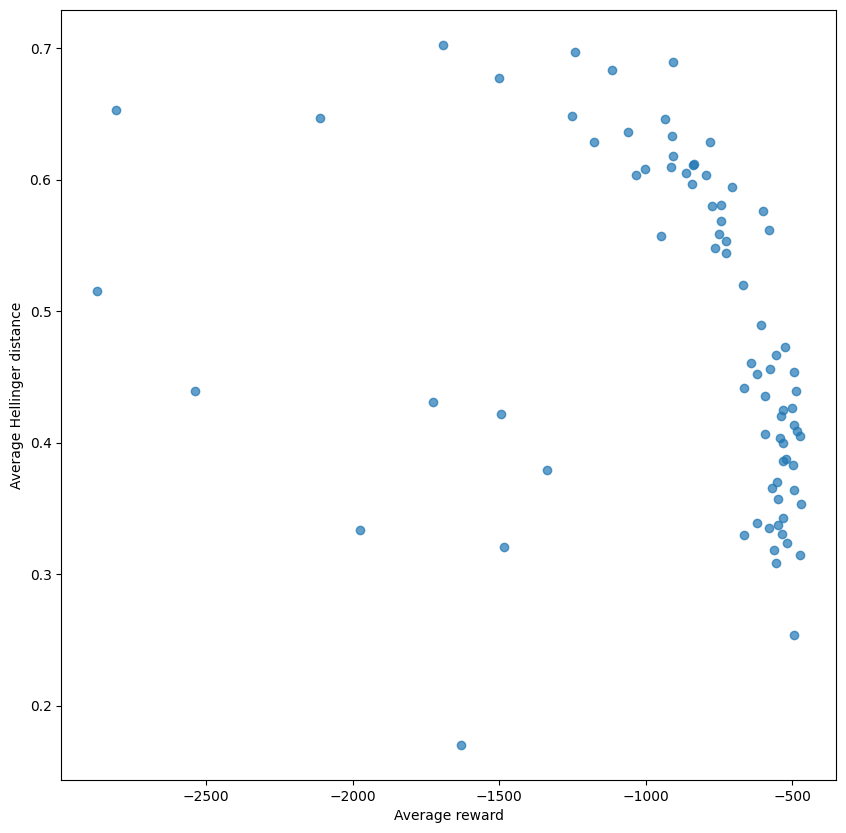

In [50]:
df_averages = []
df_envs = []
for env in ["env1", "env2"]:
    target_columns = ["config",
                f"avg_hd_distance_{env}_agent1",
                f"avg_reward_{env}_agent1",
                f"avg_hd_distance_{env}_agent2",
                f"avg_reward_{env}_agent2"]
    target_columns.extend(config_keys)
    
    df_env = df[target_columns]
    col1 = "Average reward"
    col2 = "Average Hellinger distance"
    df_env[col1] = df_env[[f"avg_reward_{env}_agent1", f"avg_reward_{env}_agent2"]].mean(axis=1)
    df_env[col2] = df_env[[f"avg_hd_distance_{env}_agent1",f"avg_hd_distance_{env}_agent2"]].mean(axis=1)
    plt.figure(figsize=(10, 10))
    plt.scatter(df_env[col1], df_env[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    # plt.title(f'Scatter Plot of {col1} vs {col2} for env {env}')
    plt.show()
    df_top_20_env = df_env[["config", col1, col2]].sort_values(col1, ascending=False).head(20)
    df_top_20_env.to_csv(f"./top_20_{env}_{experiment_name}.csv", index=False)
    df_averages.append(df_top_20_env)
    df_envs.append(df_env)

In [28]:
df_both_env = pd.merge(df_averages[0], df_averages[1], how="inner", left_on="config", right_on="config")
df_both_env.to_csv(f"./top_20_both_env_{experiment_name}.csv", index=False)

In [18]:
df_envs[0]

,config,avg_hd_distance_env1_agent1,avg_reward_env1_agent1,avg_hd_distance_env1_agent2,avg_reward_env1_agent2,avg_reward,avg_hd_distance
0,"{""delay"": 0, ""waiting_time"": 0, ""light_switche...",0.479919,-105.1640,0.581851,-181.5575,-143.36075,0.530885
1,"{""delay"": 0, ""waiting_time"": 0, ""light_switche...",0.587690,-134.8540,0.653858,-371.0550,-252.95450,0.620774
2,"{""delay"": 0, ""waiting_time"": 0, ""light_switche...",0.265117,-537.1580,0.203961,-569.4465,-553.30225,0.234539
3,"{""delay"": 0, ""waiting_time"": 0, ""light_switche...",0.512316,-788.5740,0.659035,-2547.9995,-1668.28675,0.585675
4,"{""delay"": 0, ""waiting_time"": 1, ""light_switche...",0.577145,-111.0625,0.613203,-189.2125,-150.13750,0.595174
...,...,...,...,...,...,...,...
75,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",0.535598,-100.2735,0.812510,-890.5830,-495.42825,0.674054
76,"{""delay"": 3, ""waiting_time"": 10, ""light_switch...",0.317953,-103.0215,0.381010,-97.2620,-100.14175,0.349481
77,"{""delay"": 3, ""waiting_time"": 10, ""light_switch...",0.403999,-95.9020,0.356903,-132.8575,-114.37975,0.380451
78,"{""delay"": 3, ""waiting_time"": 10, ""light_switch...",0.630703,-99.0890,0.603175,-260.5375,-179.81325,0.616939


In [48]:
for key in config_keys:
    for env in range(2):
        df_to_check = df_envs[env]
        print(f"Correlation {key} and avg_reward env {env +1}", df_to_check[key].corr(df_to_check['avg_reward']))
        print(f"Correlation {key} and avg_hd_distance {env+1}", df_to_check[key].corr(df_to_check['avg_hd_distance']))

Correlation delay and avg_reward env 1 0.2141853502015
Correlation delay and avg_hd_distance 1 -0.05591991452477129
Correlation delay and avg_reward env 2 0.26194458232430334
Correlation delay and avg_hd_distance 2 -0.07912787135941185
Correlation waiting_time and avg_reward env 1 0.2569249955426762
Correlation waiting_time and avg_hd_distance 1 -0.033671670924408176
Correlation waiting_time and avg_reward env 2 0.2047033575839203
Correlation waiting_time and avg_hd_distance 2 -0.04886760932735969
Correlation light_switches and avg_reward env 1 -0.5662903529083213
Correlation light_switches and avg_hd_distance 1 0.46254947362779286
Correlation light_switches and avg_reward env 2 -0.6699274183169449
Correlation light_switches and avg_hd_distance 2 0.5817390038299781


In [13]:
df.sort_values(by="avg_reward_env1_agent1", ascending=False).head(30)

,config,avg_hd_distance_env1_agent1,avg_reward_env1_agent1,avg_hd_distance_env1_agent2,avg_reward_env1_agent2,avg_hd_distance_env2_agent1,avg_reward_env2_agent1,avg_hd_distance_env2_agent2,avg_reward_env2_agent2,total_avg_reward,total_avg_hd_distance,delay,waiting_time,light_switches
58,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",0.581581,-88.5945,0.550899,-246.6275,0.426816,-579.7855,0.660840,-875.6625,-447.667500,0.555034,2,10,2
56,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",0.454017,-90.3070,0.451818,-104.1875,0.347055,-681.9960,0.383432,-453.1595,-332.412500,0.409081,2,10,0
40,"{""delay"": 2, ""waiting_time"": 0, ""light_switche...",0.165417,-91.5230,0.166577,-113.0595,0.241837,-527.8310,0.265417,-462.8980,-298.827875,0.209812,2,0,0
30,"{""delay"": 1, ""waiting_time"": 2, ""light_switche...",0.629671,-91.8785,0.614312,-246.9785,0.424736,-500.6970,0.692014,-997.7655,-459.329875,0.590183,1,2,2
55,"{""delay"": 2, ""waiting_time"": 3, ""light_switche...",0.605355,-92.7390,0.657625,-323.1015,0.435680,-573.2760,0.723759,-977.5495,-491.666500,0.605605,2,3,3
24,"{""delay"": 1, ""waiting_time"": 1, ""light_switche...",0.424529,-93.3405,0.484625,-141.5225,0.329059,-520.2375,0.399501,-467.6260,-305.681625,0.409429,1,1,0
50,"{""delay"": 2, ""waiting_time"": 2, ""light_switche...",0.526824,-93.6540,0.652601,-352.1520,0.409286,-525.4500,0.801066,-1196.9595,-542.053875,0.597444,2,2,2
77,"{""delay"": 3, ""waiting_time"": 10, ""light_switch...",0.403999,-95.9020,0.356903,-132.8575,0.310302,-582.5350,0.326026,-544.6780,-338.993125,0.349308,3,10,1
74,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",0.440244,-96.0755,0.510731,-213.4190,0.395017,-534.9175,0.711602,-914.3740,-439.696500,0.514399,3,3,2
25,"{""delay"": 1, ""waiting_time"": 1, ""light_switche...",0.667936,-96.1000,0.642357,-174.3855,0.388619,-504.3430,0.489448,-469.0840,-310.978125,0.547090,1,1,1


In [33]:
df.sort_values(by="avg_reward_env1_agent2", ascending=False).head(10)

,config,avg_hd_distance_env1_agent1,avg_reward_env1_agent1,avg_hd_distance_env1_agent2,avg_reward_env1_agent2,avg_hd_distance_env2_agent1,avg_reward_env2_agent1,avg_hd_distance_env2_agent2,avg_reward_env2_agent2,total_avg_reward,total_avg_hd_distance,delay,waiting_time,light_switches
60,"{""delay"": 3, ""waiting_time"": 0, ""light_switche...",0.502437,-97.1345,0.494652,-95.8665,0.306276,-630.9625,0.367772,-467.6855,-322.912250,0.417784,3,0,0
76,"{""delay"": 3, ""waiting_time"": 10, ""light_switch...",0.317953,-103.0215,0.381010,-97.2620,0.318319,-781.0155,0.341434,-545.4855,-381.696125,0.339679,3,10,0
56,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",0.454017,-90.3070,0.451818,-104.1875,0.347055,-681.9960,0.383432,-453.1595,-332.412500,0.409081,2,10,0
52,"{""delay"": 2, ""waiting_time"": 3, ""light_switche...",0.372089,-99.7870,0.416742,-112.7415,0.292077,-571.2160,0.369362,-500.4460,-321.047625,0.362567,2,3,0
40,"{""delay"": 2, ""waiting_time"": 0, ""light_switche...",0.165417,-91.5230,0.166577,-113.0595,0.241837,-527.8310,0.265417,-462.8980,-298.827875,0.209812,2,0,0
73,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",0.404659,-115.3200,0.316731,-116.4210,0.306791,-726.5175,0.370296,-516.5640,-368.705625,0.349619,3,3,1
32,"{""delay"": 1, ""waiting_time"": 3, ""light_switche...",0.415705,-110.4560,0.460064,-118.0375,0.315238,-550.8815,0.391356,-389.3845,-292.189875,0.395591,1,3,0
69,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",0.395522,-97.2315,0.349511,-118.7010,0.245056,-492.6565,0.384631,-456.0430,-291.158000,0.343680,3,2,1
36,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",0.337362,-105.3020,0.358740,-120.7720,0.270983,-653.5265,0.345076,-455.5295,-333.782500,0.328040,1,10,0
28,"{""delay"": 1, ""waiting_time"": 2, ""light_switche...",0.332696,-98.7420,0.392835,-120.9985,0.268329,-540.9335,0.379521,-495.6640,-314.084500,0.343345,1,2,0


In [35]:
df.sort_values(by="avg_reward_env2_agent1", ascending=False).head(10)

,config,avg_hd_distance_env1_agent1,avg_reward_env1_agent1,avg_hd_distance_env1_agent2,avg_reward_env1_agent2,avg_hd_distance_env2_agent1,avg_reward_env2_agent1,avg_hd_distance_env2_agent2,avg_reward_env2_agent2,total_avg_reward,total_avg_hd_distance,delay,waiting_time,light_switches
29,"{""delay"": 1, ""waiting_time"": 2, ""light_switche...",0.516732,-104.9175,0.513286,-193.9525,0.367435,-450.3095,0.442550,-496.6440,-311.455875,0.460001,1,2,1
62,"{""delay"": 3, ""waiting_time"": 0, ""light_switche...",0.557192,-98.4395,0.639653,-298.7970,0.437827,-469.3910,0.797458,-1343.7435,-552.592750,0.608033,3,0,2
57,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",0.441581,-109.2825,0.390679,-133.9705,0.336858,-482.1970,0.429612,-514.2330,-309.920750,0.399682,2,10,1
66,"{""delay"": 3, ""waiting_time"": 1, ""light_switche...",0.560631,-106.0680,0.633547,-360.2880,0.524973,-486.4740,0.663531,-928.4205,-470.312625,0.595670,3,1,2
49,"{""delay"": 2, ""waiting_time"": 2, ""light_switche...",0.397525,-107.1070,0.407751,-224.5220,0.278554,-488.2855,0.436076,-607.2555,-356.792500,0.379977,2,2,1
39,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",0.643787,-100.7910,0.656886,-314.6260,0.516916,-491.6560,0.635325,-705.3560,-403.107250,0.613229,1,10,3
69,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",0.395522,-97.2315,0.349511,-118.7010,0.245056,-492.6565,0.384631,-456.0430,-291.158000,0.343680,3,2,1
75,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",0.535598,-100.2735,0.812510,-890.5830,0.417743,-492.7345,0.840041,-1860.5060,-836.024250,0.651473,3,3,3
30,"{""delay"": 1, ""waiting_time"": 2, ""light_switche...",0.629671,-91.8785,0.614312,-246.9785,0.424736,-500.6970,0.692014,-997.7655,-459.329875,0.590183,1,2,2
25,"{""delay"": 1, ""waiting_time"": 1, ""light_switche...",0.667936,-96.1000,0.642357,-174.3855,0.388619,-504.3430,0.489448,-469.0840,-310.978125,0.547090,1,1,1


In [34]:
df.sort_values(by="avg_reward_env2_agent2", ascending=False).head(10)

,config,avg_hd_distance_env1_agent1,avg_reward_env1_agent1,avg_hd_distance_env1_agent2,avg_reward_env1_agent2,avg_hd_distance_env2_agent1,avg_reward_env2_agent1,avg_hd_distance_env2_agent2,avg_reward_env2_agent2,total_avg_reward,total_avg_hd_distance,delay,waiting_time,light_switches
16,"{""delay"": 0, ""waiting_time"": 10, ""light_switch...",0.429996,-111.3985,0.498027,-132.9290,0.345803,-663.5965,0.429706,-380.7720,-322.174000,0.425883,0,10,0
32,"{""delay"": 1, ""waiting_time"": 3, ""light_switche...",0.415705,-110.4560,0.460064,-118.0375,0.315238,-550.8815,0.391356,-389.3845,-292.189875,0.395591,1,3,0
12,"{""delay"": 0, ""waiting_time"": 3, ""light_switche...",0.562543,-110.0370,0.588327,-165.9570,0.348143,-559.6405,0.469928,-411.0735,-311.677000,0.492235,0,3,0
0,"{""delay"": 0, ""waiting_time"": 0, ""light_switche...",0.479919,-105.1640,0.581851,-181.5575,0.405035,-695.1420,0.528661,-417.0645,-349.732000,0.498867,0,0,0
8,"{""delay"": 0, ""waiting_time"": 2, ""light_switche...",0.536004,-111.7545,0.609038,-167.1585,0.368216,-553.8575,0.458775,-432.1805,-316.237750,0.493008,0,2,0
37,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",0.531493,-107.3400,0.503672,-177.4850,0.376391,-636.2825,0.463329,-438.1280,-339.808875,0.468721,1,10,1
56,"{""delay"": 2, ""waiting_time"": 10, ""light_switch...",0.454017,-90.3070,0.451818,-104.1875,0.347055,-681.9960,0.383432,-453.1595,-332.412500,0.409081,2,10,0
36,"{""delay"": 1, ""waiting_time"": 10, ""light_switch...",0.337362,-105.3020,0.358740,-120.7720,0.270983,-653.5265,0.345076,-455.5295,-333.782500,0.328040,1,10,0
69,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",0.395522,-97.2315,0.349511,-118.7010,0.245056,-492.6565,0.384631,-456.0430,-291.158000,0.343680,3,2,1
48,"{""delay"": 2, ""waiting_time"": 2, ""light_switche...",0.448779,-100.5450,0.489932,-132.0125,0.361933,-604.3955,0.437667,-459.7165,-324.167375,0.434578,2,2,0


In [11]:
for agent in itertools.product([1,2], [1,2]):
    for env in itertools.product([1,2], [1,2]):
        key_1 = f"avg_hd_distance_env{env[0]}_agent{agent[0]}"
        key_2 = f"avg_hd_distance_env{env[1]}_agent{agent[1]}"
        print(f"Correlation {key_1} and {key_2}", df[key_1].corr(df[key_2]))

Correlation avg_hd_distance_env1_agent1 and avg_hd_distance_env1_agent1 1.0
Correlation avg_hd_distance_env1_agent1 and avg_hd_distance_env2_agent1 0.5938137495027741
Correlation avg_hd_distance_env2_agent1 and avg_hd_distance_env1_agent1 0.5938137495027741
Correlation avg_hd_distance_env2_agent1 and avg_hd_distance_env2_agent1 1.0
Correlation avg_hd_distance_env1_agent1 and avg_hd_distance_env1_agent2 0.7580264557175916
Correlation avg_hd_distance_env1_agent1 and avg_hd_distance_env2_agent2 0.6233860131690054
Correlation avg_hd_distance_env2_agent1 and avg_hd_distance_env1_agent2 0.4299976917862225
Correlation avg_hd_distance_env2_agent1 and avg_hd_distance_env2_agent2 0.48041450520962814
Correlation avg_hd_distance_env1_agent2 and avg_hd_distance_env1_agent1 0.7580264557175918
Correlation avg_hd_distance_env1_agent2 and avg_hd_distance_env2_agent1 0.42999769178622255
Correlation avg_hd_distance_env2_agent2 and avg_hd_distance_env1_agent1 0.6233860131690054
Correlation avg_hd_distance

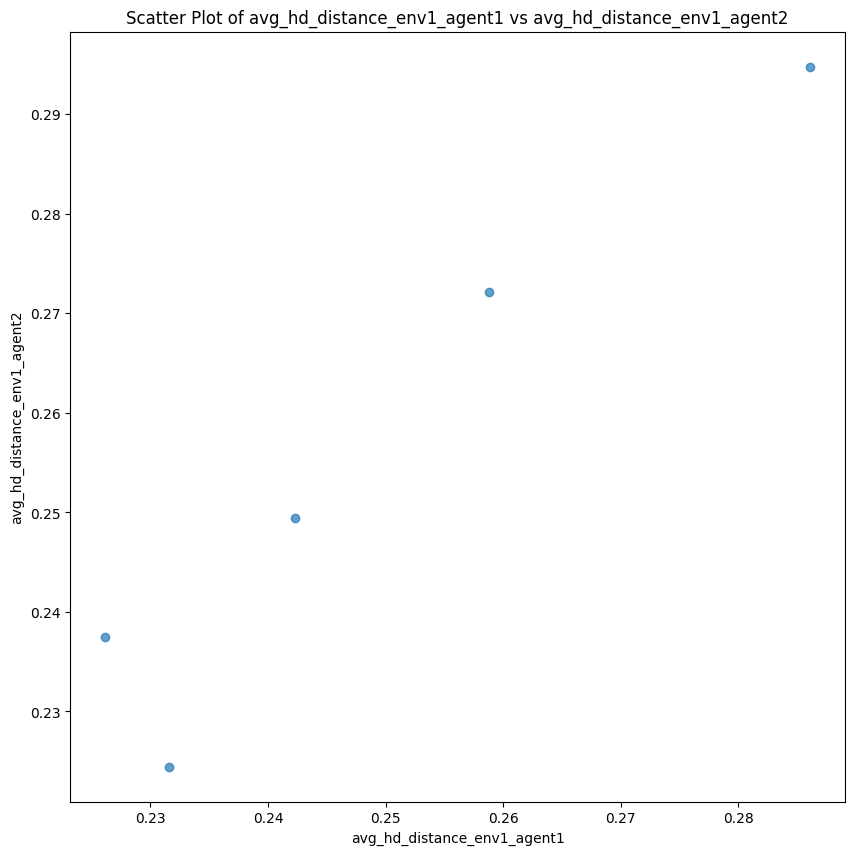

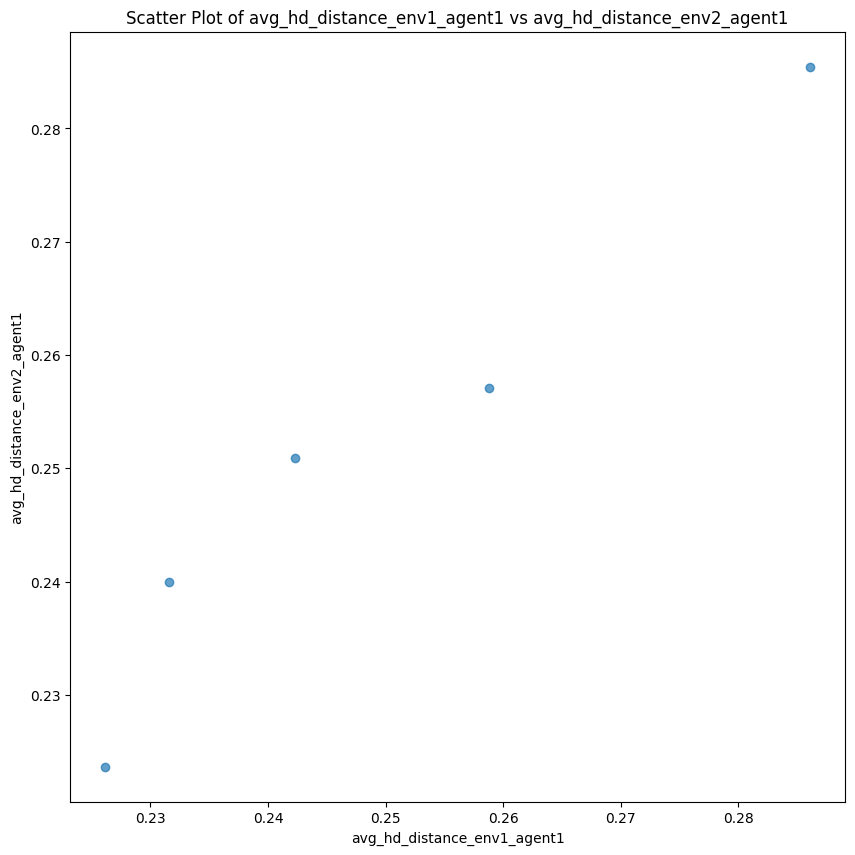

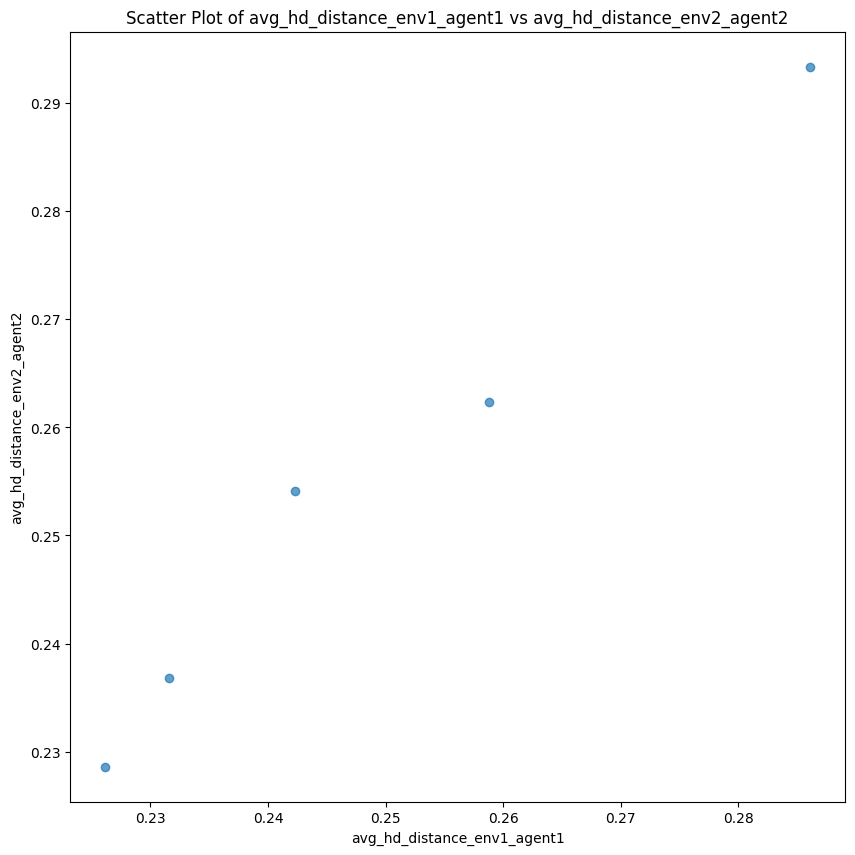

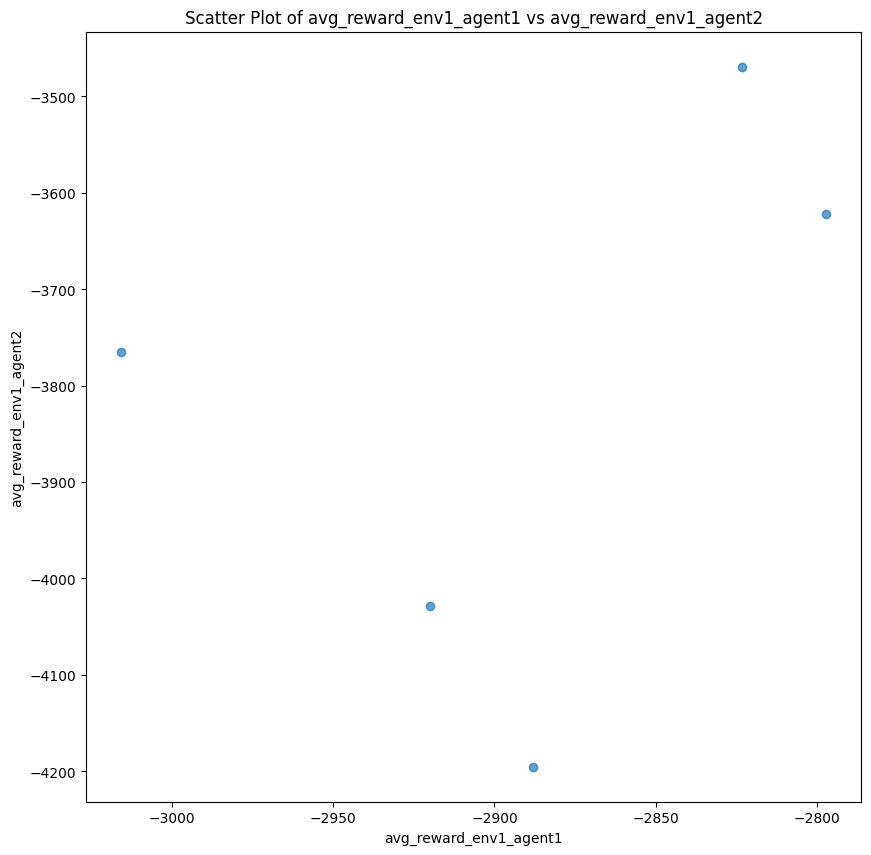

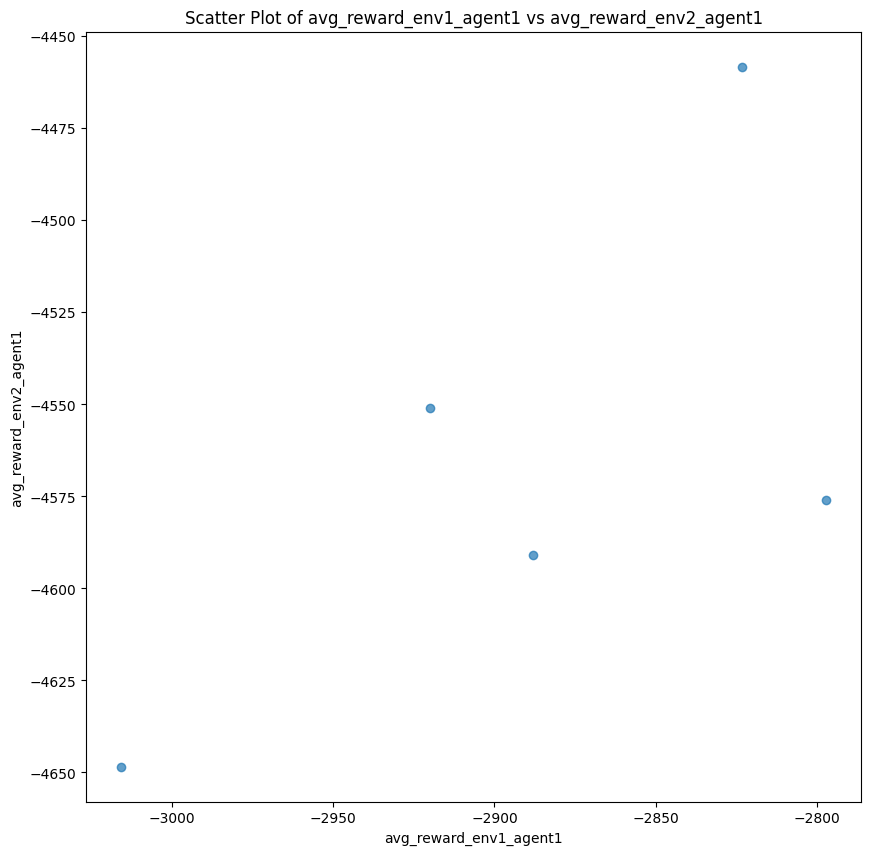

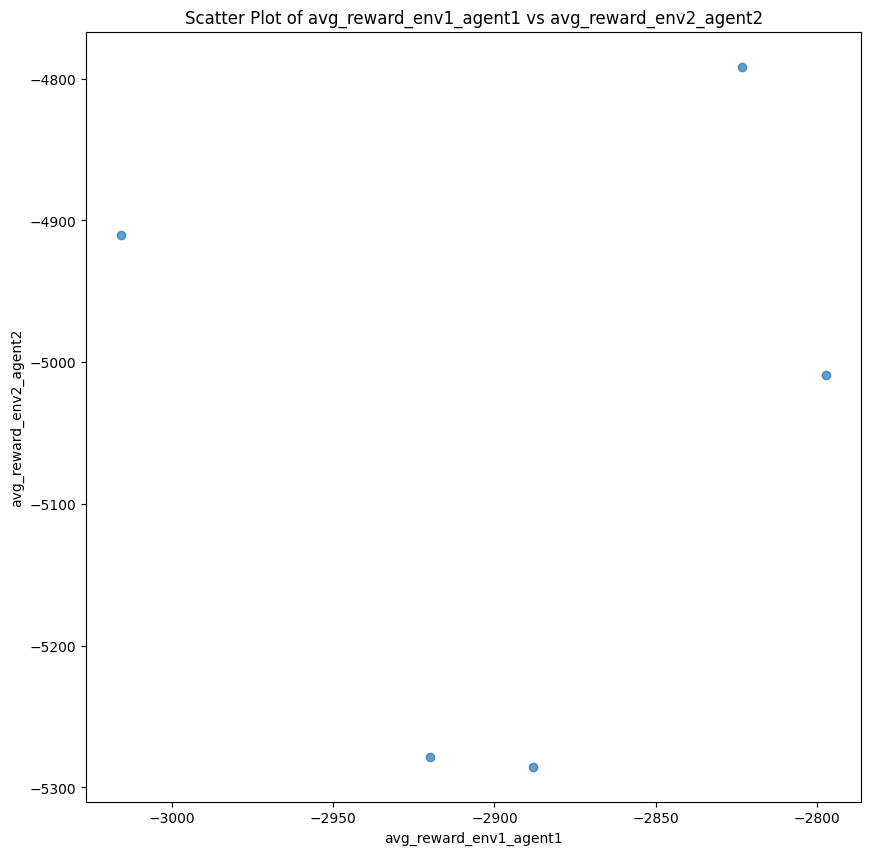

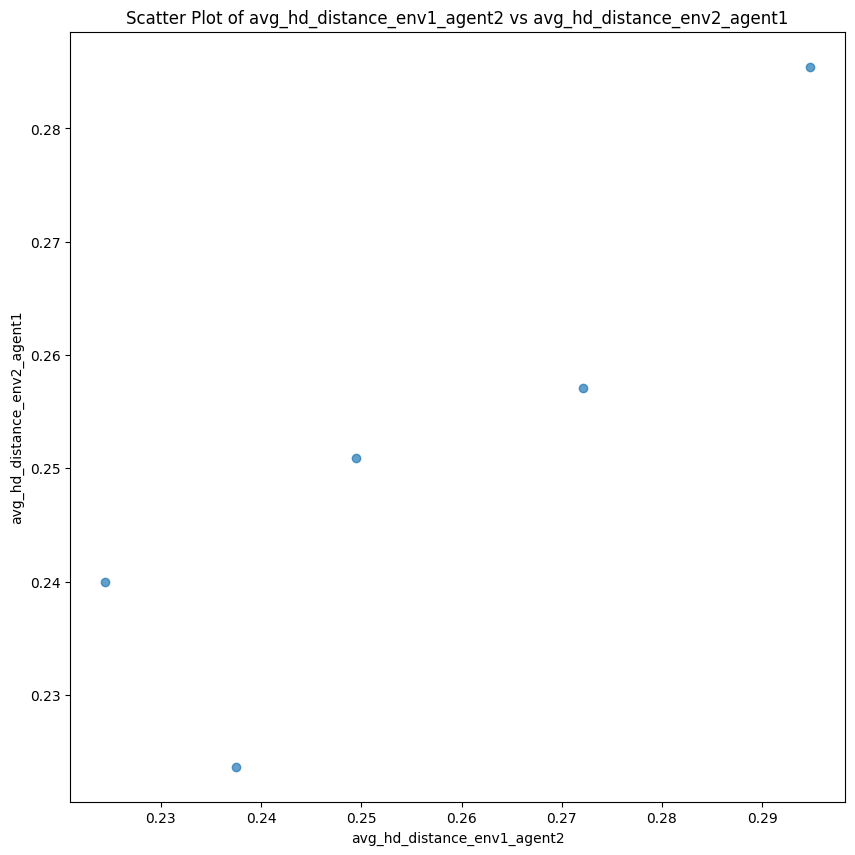

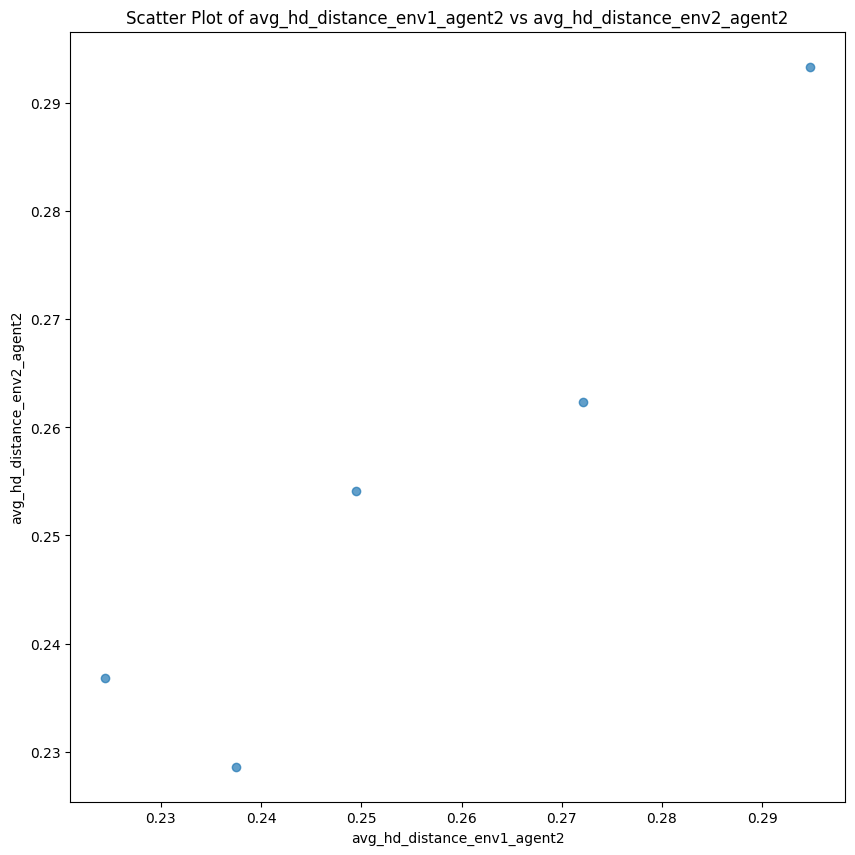

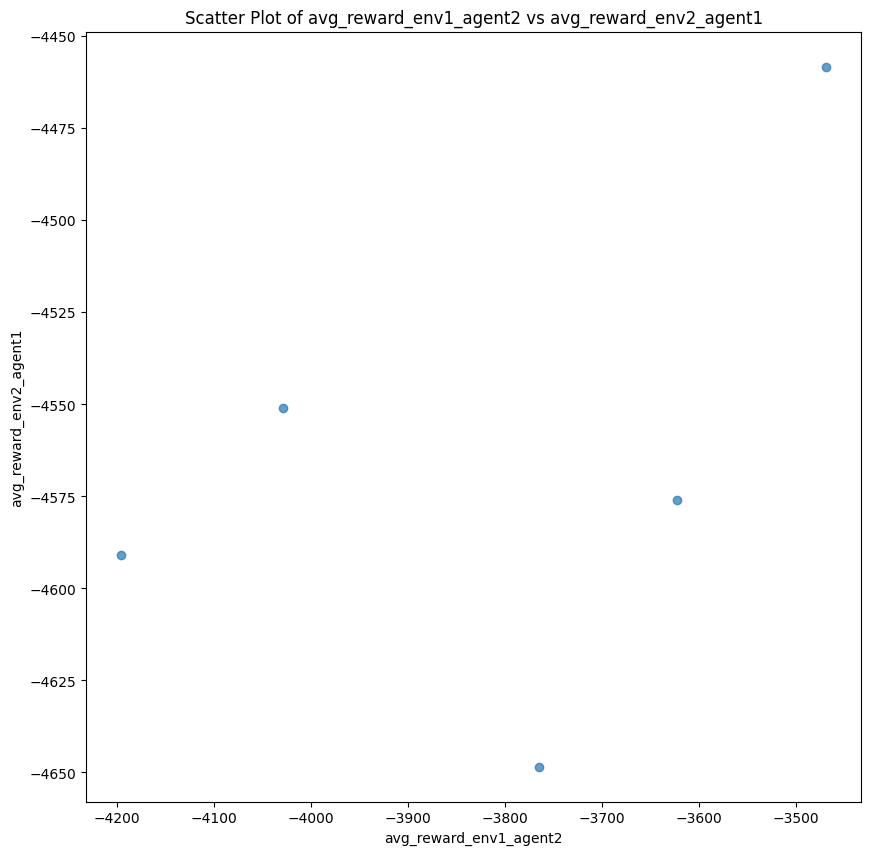

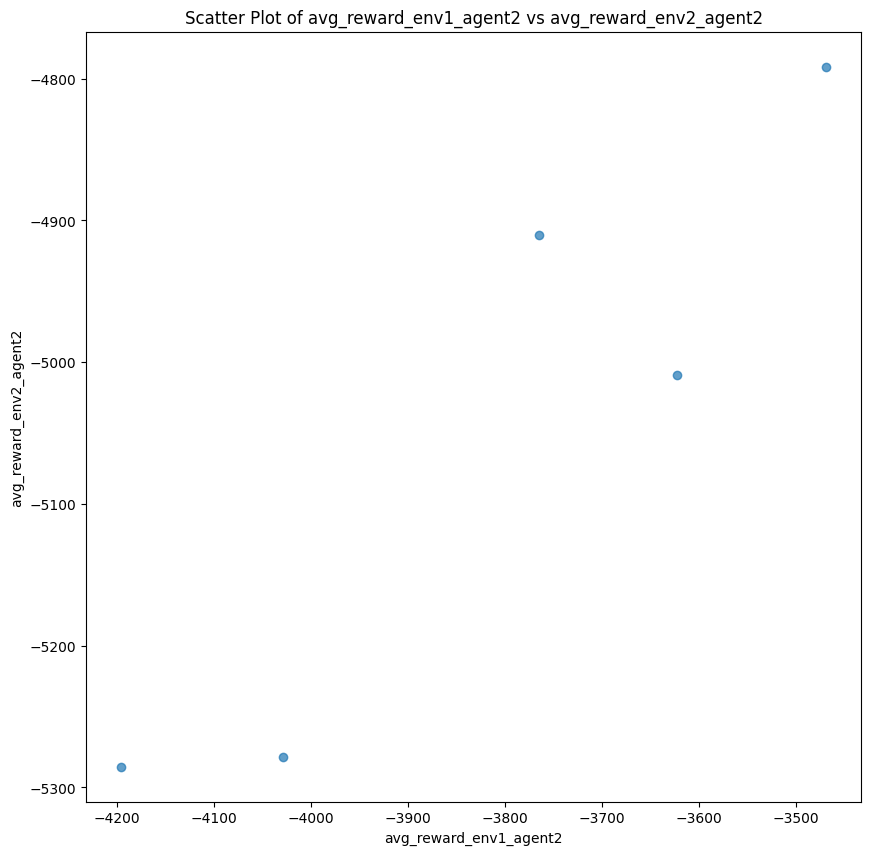

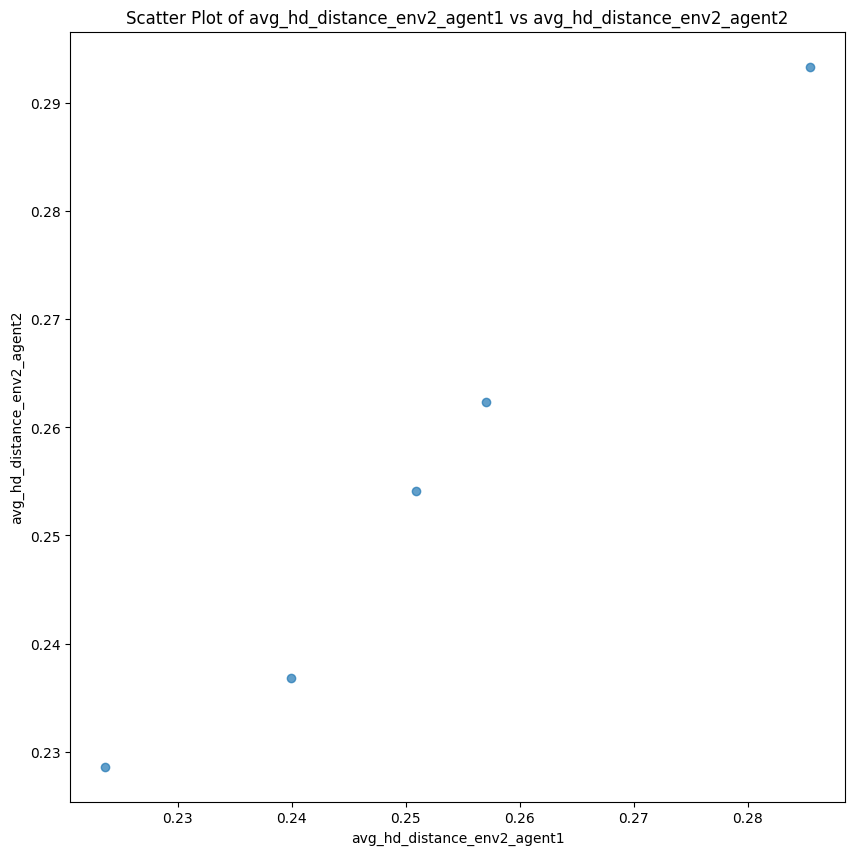

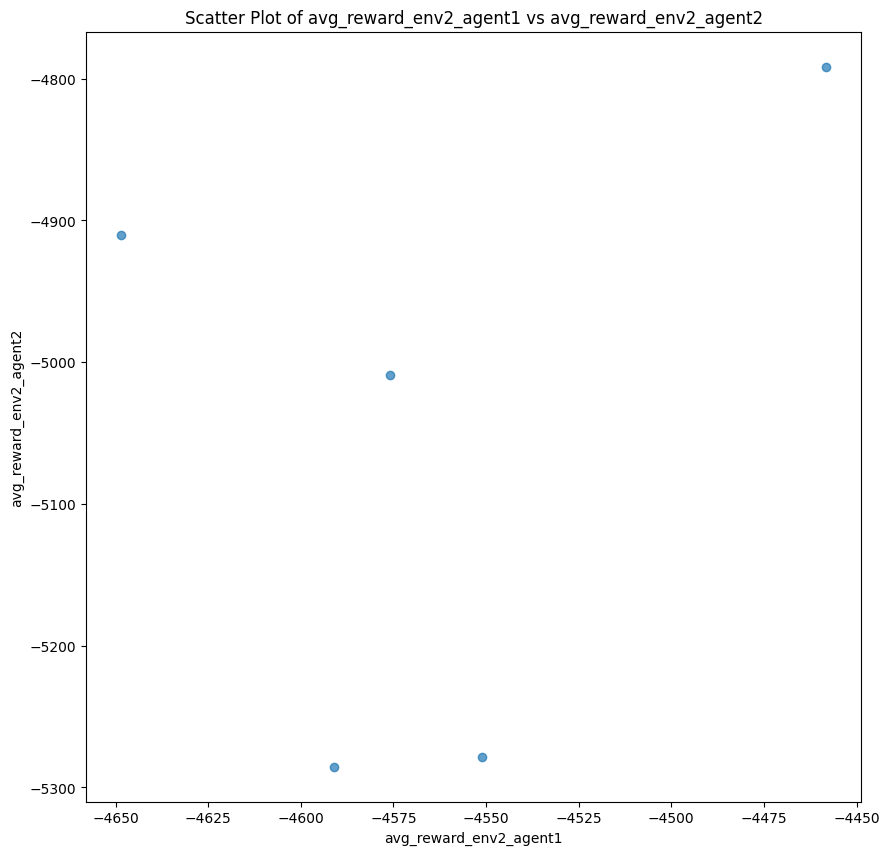

In [16]:


column_pairs = list(itertools.combinations(df.columns, 2))

# Create scatter plots
# naming convention: {metric}_{traffic}_{agent}
for col1, col2 in column_pairs:
    if col1.startswith("avg_hd_distance") and col2.startswith("avg_hd_distance"):
        pass
    elif col1.startswith("avg_reward") and col2.startswith("avg_reward"):
        pass
    else:
        continue
    
    if col1 == "config" or col2 == "config":
        continue
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()